In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df = df.dropna(subset=['target'])

# change the blanks in far_price and near_price to mean value
far_price_mean = df['far_price'].mean()
near_price_mean = df['near_price'].mean()
df['far_price'].fillna(far_price_mean, inplace=True)
df['near_price'].fillna(near_price_mean, inplace=True)

In [2]:
# set nosies if the value exceed for three sigmas
# delete the noise of far_price and near_price
far_price_std = df['far_price'].std()
near_price_std = df['near_price'].std()
far_price_upper_limit = far_price_mean + 3 * far_price_std
far_price_lower_limit = far_price_mean - 3 * far_price_std

df = df[
    (df['far_price'] <= far_price_upper_limit) &
    (df['far_price'] >= far_price_lower_limit) ]

df.to_csv('cleaned_train.csv', index=False)
df.head(5)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,1.001713,0.99966,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,1.001713,0.99966,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,1.001713,0.99966,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,1.001713,0.99966,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,1.001713,0.99966,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


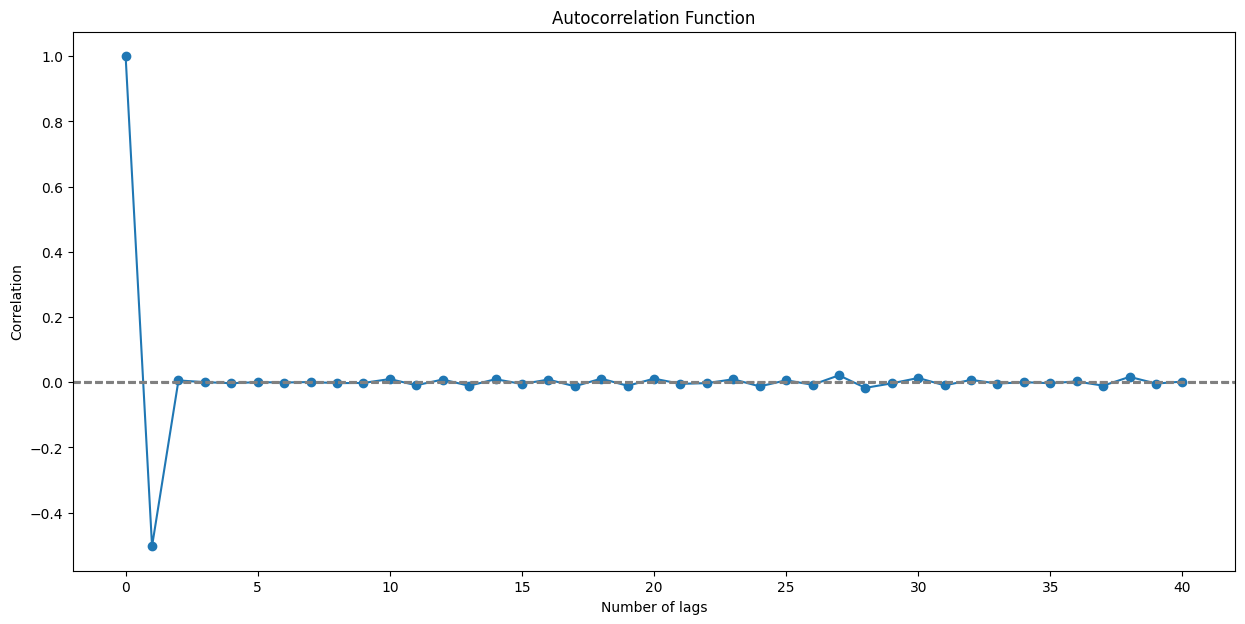

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

df['ask_price_diff'] = df['ask_price'].diff().dropna()

# Compute the ACF for the first-order differenced series
lag_acf = acf(df['ask_price_diff'].dropna(), nlags=40)

# Plot the ACF
plt.figure(figsize=(15, 7))
plt.plot(lag_acf, marker='o')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df['ask_price_diff'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df['ask_price_diff'])), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('Correlation')
plt.show()



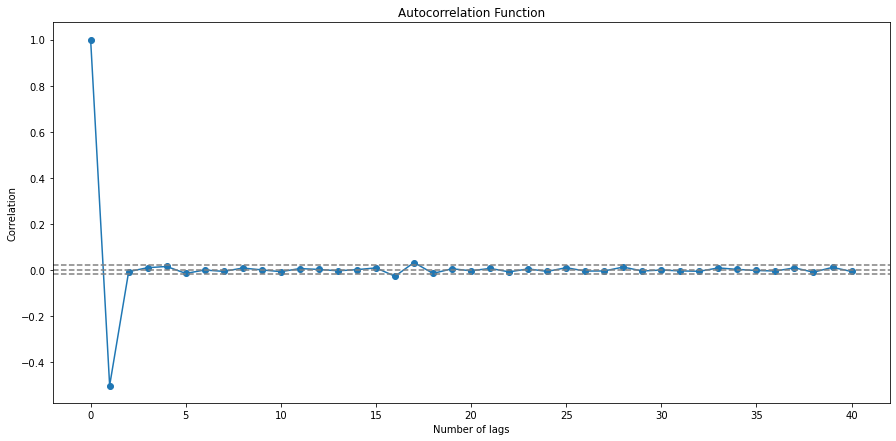

In [ ]:
df1['matched_size_diff'] = df1['matched_size'].diff().dropna()

lag_acf = acf(df1['matched_size_diff'].dropna(), nlags=40)

plt.figure(figsize=(15, 7))
plt.plot(lag_acf, marker='o')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df1['matched_size_diff'])), linestyle='--', color='grey')
plt.axhline(y=1.96/np.sqrt(len(df1['matched_size_diff'])), linestyle='--', color='grey')
plt.title('Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('Correlation')
plt.show()

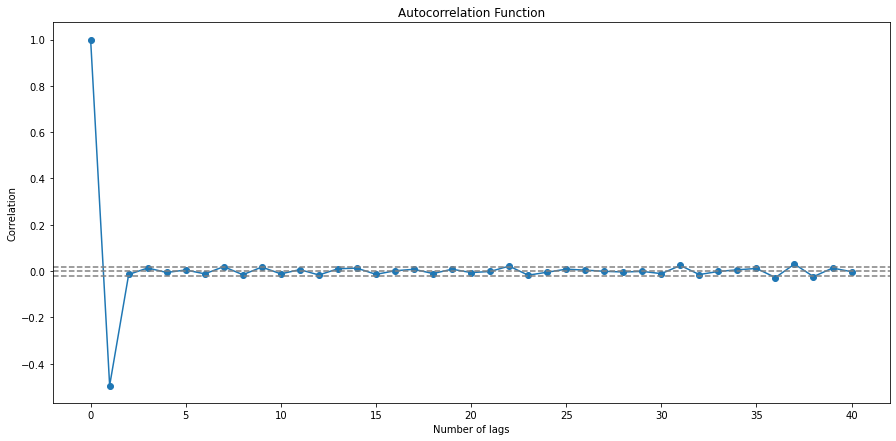

In [ ]:
df2['imbalance_size_diff'] = df2['imbalance_size'].diff().dropna()

lag_acf = acf(df2['imbalance_size_diff'].dropna(), nlags=40)

plt.figure(figsize=(15, 7))
plt.plot(lag_acf, marker='o')
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df2['imbalance_size_diff'])), linestyle='--', color='grey')
plt.axhline(y=1.96/np.sqrt(len(df2['imbalance_size_diff'])), linestyle='--', color='grey')
plt.title('Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('Correlation')
plt.show()

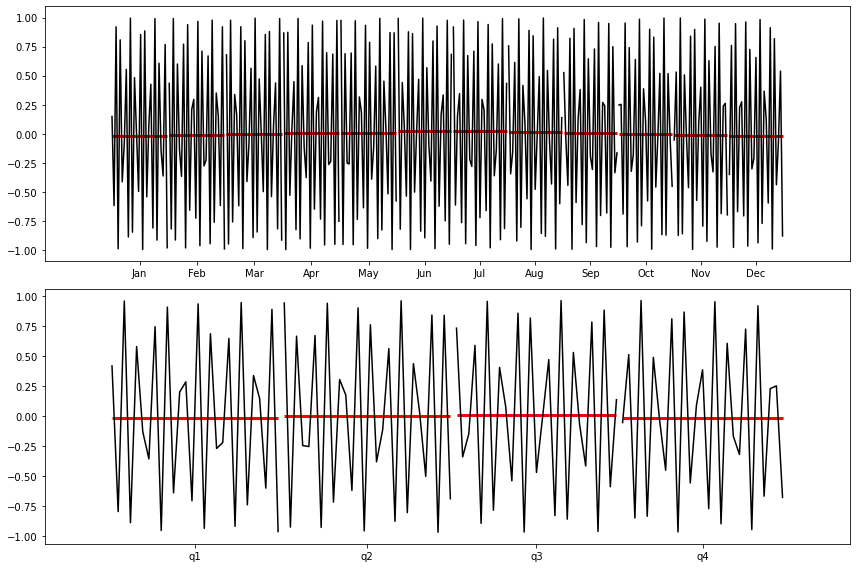

In [ ]:
#test seasonality
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

dates = pd.date_range(start='2020-01-01',periods=10000, freq='D')
values = np.sin(np.linspace(0, 100, 10000))
seasonal_df = pd.DataFrame({'ask_price': values}, index=dates)

# Perform month and quarter plots to visualize seasonality
monthly = seasonal_df['ask_price'].resample('M').mean()
quarterly = seasonal_df['ask_price'].resample('Q').mean()

# Plot the seasonal decomposition using month_plot and quarter_plot
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
month_plot(monthly, ax=ax[0])
quarter_plot(quarterly, ax=ax[1])
plt.tight_layout()
plt.show()


In [ ]:
#remove seasonality
from scipy import signal

detrended = signal.detrend(df['ask_price'].values)
df['ask_price_detrended'] = detrended


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(seasonal_df['ask_price'])

# Output the test results
df_output = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in result[4].items():
    df_output['Critical Value (%s)' % key] = value

df_output


Test Statistic                -7.280174e+11
p-value                        0.000000e+00
#Lags Used                     1.000000e+00
Number of Observations Used    9.998000e+03
Critical Value (1%)           -3.431004e+00
Critical Value (5%)           -2.861829e+00
Critical Value (10%)          -2.566924e+00
dtype: float64

In [ ]:
df.head(4)

,ask_price,ask_price_diff,ask_price_detrended,constant,intercept
0,0.195595,NaN,0.164637,1,1.0
1,0.166497,-0.029099,0.135545,1,1.0
2,0.679174,0.512677,0.648229,1,1.0
3,-0.074081,-0.753255,-0.105020,1,1.0


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1['constant'] = 1
df2['constant']=1

X1 = df1[['matched_size', 'constant']]
y1 = df2['imbalance_size']
model1 = sm.OLS(y1, X1).fit()

X2 = df2[['imbalance_size', 'constant']]
y2 = df1['matched_size']
model2 = sm.OLS(y2, X2).fit()

# Calculate VIF
vif_imbalance_size = 1 / (1 - model1.rsquared)
vif_matched_size = 1 / (1 - model2.rsquared)

vif_imbalance_size, vif_matched_size



(1.000235185315258, 1.0002351853152576)

In [ ]:
from statsmodels.stats.stattools import durbin_watson

X = df2[['imbalance_size', 'constant']]
y = df1['matched_size']

model = sm.OLS(y, X).fit()

dw_statistic = durbin_watson(model.resid)

dw_statistic


2.0159674899224878

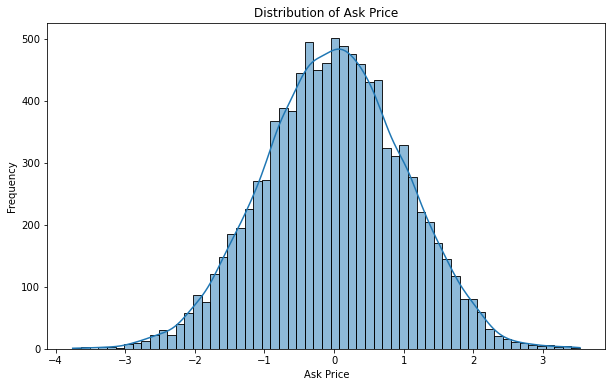

Kurtosis of ask_price: -0.04013369271582157
Skewness of ask_price: -0.032582907393955064


In [ ]:
#data Screening
import seaborn as sns
from scipy.stats import kurtosis, skew

# Plotting the distribution of 'ask_price'
plt.figure(figsize=(10, 6))
sns.histplot(df['ask_price'], kde=True)
plt.title('Distribution of Ask Price')
plt.xlabel('Ask Price')
plt.ylabel('Frequency')
plt.show()

# Calculating kurtosis and skewness
ask_price_kurtosis = kurtosis(df['ask_price'])
ask_price_skewness = skew(df['ask_price'])

# Print the kurtosis and skewness
print('Kurtosis of ask_price:', ask_price_kurtosis)
print('Skewness of ask_price:', ask_price_skewness)


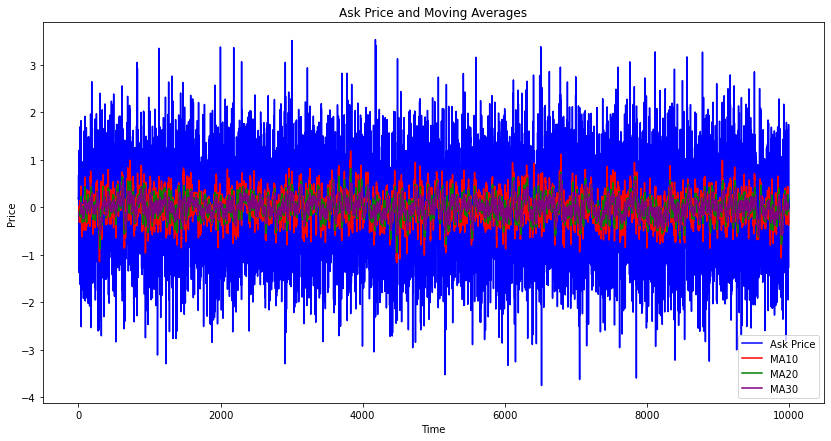

In [ ]:
#moving averages
df['MA10'] = df['ask_price'].rolling(window=10).mean()
df['MA20'] = df['ask_price'].rolling(window=20).mean()
df['MA30'] = df['ask_price'].rolling(window=30).mean()

# Plot the ask_price and the moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['ask_price'], label='Ask Price', color='blue')
plt.plot(df['MA10'], label='MA10', color='red')
plt.plot(df['MA20'], label='MA20', color='green')
plt.plot(df['MA30'], label='MA30', color='purple')

# Customize the plot
plt.title('Ask Price and Moving Averages')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from arch import arch_model

df = df[df['ask_price'] > 0]
df['log_ask_price_returns'] = np.log(df['ask_price'] / df['ask_price'].shift(1))

# Ensure no infinite values after cleaning
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Specify the GJR-GARCH model using log returns
gjr_model = arch_model(df['log_ask_price_returns'], vol='Garch', p=1, o=1, q=1)
gjr_results = gjr_model.fit(update_freq=5)
print(gjr_results.summary())

# Forecast the next step
forecasts = gjr_results.forecast(horizon=1)

# Print the forecasted variance
print(forecasts.variance[-1:])


Iteration:      5,   Func. Count:     38,   Neg. LLF: 40063.51799242858
Iteration:     10,   Func. Count:     71,   Neg. LLF: 8863.005895973842
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8863.005807127629
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
                     Constant Mean - GJR-GARCH Model Results                     
Dep. Variable:     log_ask_price_returns   R-squared:                       0.000
Mean Model:                Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     GJR-GARCH   Log-Likelihood:               -8863.01
Distribution:                     Normal   AIC:                           17736.0
Method:               Maximum Likelihood   BIC:                           17768.6
                                           No. Observations:                 4991
Date:                   Wed, Nov 29 2023   Df Residuals:                 

/Users/quyongyuan/opt/anaconda3/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from arch import arch_model

# Assuming df is your DataFrame and it has been preprocessed as per your code

# Your existing code for setting up and fitting the GJR-GARCH model
df['log_ask_price_returns'] = np.log(df['ask_price'] / df['ask_price'].shift(1))
df = df.replace([np.inf, -np.inf], np.nan).dropna()

gjr_model = arch_model(df['log_ask_price_returns'], vol='Garch', p=1, o=1, q=1)
gjr_results = gjr_model.fit(update_freq=5)

# Forecasting the next step
forecasts = gjr_results.forecast(horizon=1)

# The forecasted variance for the next step
forecasted_variance = forecasts.variance.iloc[-1]

# Calculating the conditional volatility (which is the square root of the variance)
conditional_volatility = np.sqrt(forecasted_variance)

print("Forecasted Variance:\n", forecasted_variance)
print("Conditional Volatility:\n", conditional_volatility)












Iteration:      5,   Func. Count:     38,   Neg. LLF: 40113.62704908579
Iteration:     10,   Func. Count:     71,   Neg. LLF: 8857.939242355616
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8857.939161620048
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
Forecasted Variance:
 h.1    1.632339
Name: 9998, dtype: float64
Conditional Volatility:
 h.1    1.27763
Name: 9998, dtype: float64


/Users/quyongyuan/opt/anaconda3/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      5,   Func. Count:     35,   Neg. LLF: 24362.874368987937
Iteration:     10,   Func. Count:     67,   Neg. LLF: 24104.836744506174
Iteration:     15,   Func. Count:     97,   Neg. LLF: 24100.67582062698
Iteration:     20,   Func. Count:    127,   Neg. LLF: 24069.593368298112
Iteration:     25,   Func. Count:    158,   Neg. LLF: 24068.887283925633
Optimization terminated successfully    (Exit mode 0)
            Current function value: 24068.887296858673
            Iterations: 27
            Function evaluations: 168
            Gradient evaluations: 25
     lb_stat  lb_pvalue
10  5.641187   0.844455


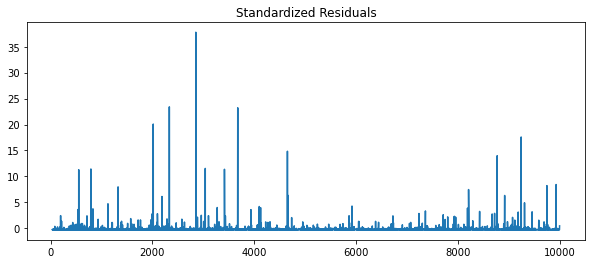

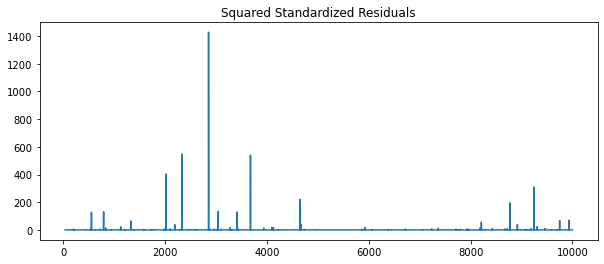

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

gjr_results = gjr_model.fit(update_freq=5)

# test serial correlation of residuals
lb_test = acorr_ljungbox(gjr_results.std_resid, lags=[10], return_df=True)

print(lb_test)

plt.figure(figsize=(10,4))
plt.plot(gjr_results.std_resid)
plt.title('Standardized Residuals')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(gjr_results.std_resid**2)
plt.title('Squared Standardized Residuals')
plt.show()


In [ ]:
from pykalman import KalmanFilter

#Risk Management Part
df['ask_price_returns'] = df['ask_price'].pct_change().dropna()

# Define Kalman Filter
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=0,
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=1)

state_means, state_covariances = kf.filter(df['ask_price_returns'].values)
df['volatility'] = np.sqrt(state_covariances[:, 0])

from scipy.stats import norm
confidence_level = 0.95

# Calculate VaR
VaR = norm.ppf(1 - confidence_level) * df['volatility'].iloc[-1]
print(f"VaR at {confidence_level * 100}% confidence level: {VaR}")


VaR at 95.0% confidence level: -1.2931039450371944


In [3]:
#Multiple Linear Regression
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

selected_columns_df = df[['matched_size', 'imbalance_size', 'ask_price']]
selected_columns_df1 = df[['far_price', 'near_price', 'bid_price', 'bid_size', 'target','ask_size']]
df3 = pd.concat([selected_columns_df, selected_columns_df1], axis=1)
df3 = df.dropna(subset=['matched_size', 'imbalance_size', 'ask_price'])
df3 = df.dropna(subset=['far_price', 'near_price', 'bid_price', 'bid_size', 'target','ask_size'])
test_df = pd.read_csv('test.csv')
test_df = test_df.dropna(subset=['imbalance_size', 'matched_size','far_price','near_price','bid_price','ask_price'])
X_test = test_df[['imbalance_size', 'matched_size','far_price','near_price','bid_price']]
y_test = test_df['ask_price']

In [4]:
#Model Building
import statsmodels.api as sm
X_train = df3[['imbalance_size', 'matched_size','far_price','near_price','bid_price']]
y_train = df3['ask_price']
model = LinearRegression()
model.fit(X_train, y_train)

model_sm = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_summary = model_sm.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:              ask_price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                 1.896e+07
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:47:24   Log-Likelihood:             3.1653e+07
No. Observations:             5237682   AIC:                        -6.331e+07
Df Residuals:                 5237676   BIC:                        -6.331e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0240      0.000    237.

In [5]:
# Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['imbalance_size', 'matched_size','far_price','near_price','bid_price'] = X_train.columns
print(vif)

   VIF Factor (imbalance_size, matched_size, far_price, near_price, bid_price)
0    1.356646                                     imbalance_size              
1    1.356450                                       matched_size              
2    1.828506                                          far_price              
3    1.978243                                         near_price              
4    0.108117                                          bid_price              


In [8]:
# Residual Analysis
import seaborn as sns
import matplotlib.pyplot as plt
predicted_values = model.predict(X_train)
residuals = y_train - predicted_values

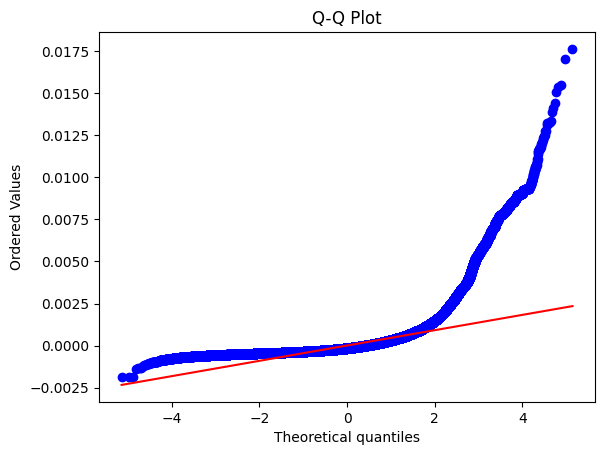

In [10]:
# Q-Q Plot:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

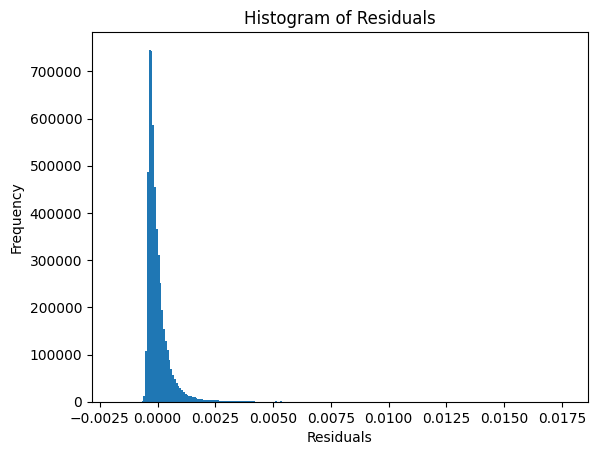

In [14]:
# Histogram of Residuals:
plt.hist(residuals, bins=250)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [15]:
# Model Selection and Optimization
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Use Recursive Feature Elimination
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train, y_train)
# Evaluate the model using cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5)

array([0.94721035, 0.96544009, 0.96664185, 0.93444251, 0.90504185])

In [27]:
# Evaluate the model by MSE & MAE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse, mae

(4.816958205834511e-07, 0.00036601688455121785)

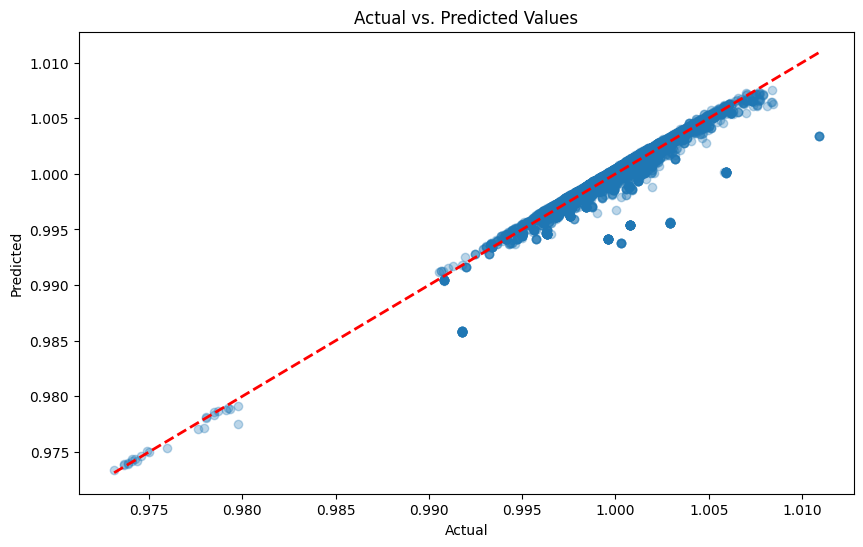

In [13]:
# Actual vs. Predicted Values Plot
y_pred = model.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()